(sec:BayesianAdvantages)=
# Advantages of the Bayesian approach

```{epigraph}
> “Bayesian inference probabilities are a measure of our state of knowledge about nature, not a measure of nature itself."

-- Devinderjit Sivia 
```

The Bayesian approach offers a number of distinct advantages in scientific applications. Some of them are listed below. In this chapter we introduce in particular the important tasks of inference with parametric models and the propagation of errors. 

```{admonition} How the Bayesian approach helps in science
1. Provides an elegantly simple and rational approach for answering any scientific question for a given state of information. The procedure is well-defined:
   * Clearly state your question and prior information.
   * Apply the sum and product rules. The starting point is always Bayes’ theorem.
2. Provides a way of eliminating nuisance parameters through marginalization. 
   * For some problems, the marginalization can be performed analytically, permitting certain calculations to become computationally tractable.
3. Provides a well-defined procedure for propagating errors,
   * E.g., incorporating the effects of systematic errors arising from both the measurement operation and theoretical model predictions.
4. Incorporates relevant prior (e.g., known signal model or known theory model expansion) information through Bayes’ theorem. 
   * This is one of the great strengths of Bayesian analysis.
   * Enforces explicit assumptions.
   * For data with a small signal-to-noise ratio, a Bayesian analysis can frequently yield many orders of magnitude improvement in model parameter estimation, through the incorporation of relevant prior information about the signal model.
5. For some problems, a Bayesian analysis may simply lead to a familiar statistic. Even in this situation it often provides a powerful new insight concerning the interpretation of the statistic.
6. Provides a more powerful way of assessing competing theories at the forefront of science by automatically quantifying Occam’s razor. 
   * The evidence for two hypotheses or models, $M_i$ and $M_j$, can be compared in light of data $\data$ by evaluating the ratio $p(M_i|\data, I) / (M_j|\data, I)$.
   * The Bayesian quantitative Occam’s razor can also save a lot of time that might otherwise be spent chasing noise artifacts that masquerade as possible detections of real phenomena.
```


````{admonition} Occam's razor
:class: tip
Occam’s razor is a principle attributed to the medieval philosopher William of Occam (or Ockham). The principle states that one should not make more assumptions than the minimum needed. It underlies all scientific modeling and theory building. It cautions us to choose from a set of otherwise equivalent models of a given phenomenon the simplest one. In any given model, Occam’s razor helps us to "shave off" those variables that are not really needed to explain the phenomenon. It was previously thought to be only a qualitative principle.

```{figure} ./figs/Leprechaun_or_Clurichaun.png
:height: 250px
:name: fig-Leprechaun

Did the Leprechaun drink your wine, or is there a simpler explanation?
```
````

## Inference with parametric models

Inductive inference with parametric models is a very important tool in the natural sciences.
* Consider $N$ different models $M_i$ ($i = 1, \ldots, N$), each with a parameter vector $\pars_i$. The number of parameters (length of $\pars_i$) might be different for different models. Each of them implies a sampling distribution for possible data

\begin{equation}
p(\data|{\pars}_i, M_i)
\end{equation}

* The likelihood function is the pdf of the actual, observed data ($\data_\mathrm{obs}$) given a set of parameters $\boldsymbol{\theta}_i$:

\begin{equation}
{\mathcal{L}}_i (\pars_i) \equiv p(\data_\mathrm{obs}|\pars_i, M_i)
\end{equation}
* We may be uncertain about $M_i$ (model uncertainty),
* or uncertain about $\pars_i$ (parameter uncertainty).


```{Admonition} Parameter Estimation:
  :class: tip
  Premise: We have chosen a model (say $M_1$)
  
  $\Rightarrow$ What can we say about its parameters $\boldsymbol{\theta}_1$?
  ```
```{Admonition} Model comparison:
  :class: tip
  Premise: We have a set of different models $\{M_i\}$
  
  $\Rightarrow$ How do they compare with each other? Do we have evidence to say that, e.g. $M_1$, is better than $M_2$?
  ```
```{Admonition} Model checking:
  :class: tip
  Premise: We have a model $M_1$
  
  $\Rightarrow$ Is $M_1$ adequate?
  ```
```{Admonition} Hybrid Uncertainty:
  :class: tip
  Premise: Models share some common parameters: $\pars_i = \{ \boldsymbol{\varphi}, {\boldsymbol{\eta}}_i\}$
  
  $\Rightarrow$ What can we say about $\boldsymbol{\varphi}$? (Systematic error is an example)
```
  
Further discussion on parameter estimation and scientific model predictions will appear in subsequent chapters. 

```{figure} ./figs/m1m2.png
:name: fig-m1m2
:width: 400px
:align: center

Joint pdf for the masses of two black holes merging obtained from the data analysis of a gravitational wave signal. This representation of a joint pdf is known as a corner plot. 
```



## Error propagation (I): Nuisance parameters and marginalization

The Bayesian approach offers a straightforward approach for dealing with (known) systematic uncertainties; namely by marginalization. 

Assume that we have a model with two parameters, $\theta,\phi$, although only one of them (say $\theta$) is of physical relevance. The other one is then labeled a nuisance parameter. Through a Bayesian data analysis we can get the the joint posterior PDF

\begin{equation}
\pdf{\theta, \phi}{\data, I}.
\end{equation}

The marginal posterior PDF $\pdf{\theta}{\data, I}$ is obtained via marginalization

\begin{equation}
\pdf{\theta}{\data, I} = \int \pdf{\theta, \phi}{\data, I} d\phi.
\end{equation}

This simple procedure allows to propagate the uncertainty in $\phi$ to the probability distribution for $\theta$.

{prf:ref}`example:BayesianAdvantage:inferring-galactic-distances` provides an illustration of this scenario.

```{admonition} Marginalization using samples
:class: tip
Assume that we have $N$ samples from the joint pdf $\pdf{\theta, \phi}{\data, I}$. This might a sample chain from an MCMC sampler: $\left\{ (\theta, \phi)_i \right\}_{i=0}^{N-1}$. Then the marginal distribution of $\theta$ will be given by the same chain by simply ignoring the $\phi$ column, i.e., $\left\{ \theta_{i} \right\}_{i=0}^{N-1}$. 

See the interactive demos created by Chi Feng for an illustration of this: [The Markov-chain Monte Carlo Interactive Gallery](https://chi-feng.github.io/mcmc-demo/).
```

A slightly more general scenario for which the marginalization procedure is useful is the following: Assume that we have measured or inferred the parameters $X$ and $Y$; what can we say about the difference $X-Y$ or the raio $X/Y$, or the sum of their squares $X^2+Y^2$, etc? 

Such questions can be rephrased as: Given the joint PDF $\pdf{x,y}{I}$, what is $\pdf{z}{I}$, where $z=f(x,y)$? Here, and in the following, we use shorthands $\pdf{z}{I}$, $\pdf{x,y}{I}$ instead of the more correct $p_Z(z|I)$, $p_{X,Y}(x,y|I)$. The context should make it clear which random variable(s) that are referred to.

In this situation we can use marginalization and the product rule. 

\begin{equation}
\pdf{z}{I} = \int \pdf{z,x,y}{I}dxdy = \int \pdf{z}{x,y,I} \pdf{x,y}{I}dxdy.
\end{equation}

We realize that $\pdf{z}{x,y,I} = \delta(z-f(x,y))$ due to the functional relationship between the parameters.

```{admonition} Dirac delta functions
A delta function $\delta(x-x_0)$ can be constructed as the limiting case of a distribution

$$
\delta(x-x_0) = \lim_{\varepsilon \to 0^+} h_{\varepsilon}(x-x_0).
$$

For example, it can be constructed as an infinitely narrow (and tall) normal distribution

$$
\delta(x-x_0) = \lim_{\varepsilon \to 0^+} \frac{1}{\sqrt{2\pi}\varepsilon} \exp\left( -\frac{(x-x_0)^2}{2\varepsilon^2}\right).
$$

This function will be zero for $x \neq x_0$, and goes to infinity at $x_0$ in a way such that the integral $\int_{-\infty}^{+\infty} \delta(x-x_0) dx = 1$, which is a defining property.

More general, for well-behaved functions $f(x)$, we have $\int_{-\infty}^{+\infty} f(x) \delta(x-x_0) dx = f(x_0)$.
```

The joint PDF for $X$ and $Y$ becomes a product if the errors are independent $\pdf{x,y}{I} = \pdf{x}{I} \pdf{y}{I}$ . The delta function can be used to evaluate one of the integrals, giving some inverse transformation $y=g(x,z)$, and the PDF for $Z$ becomes a convolution

$$
\pdf{z}{I} = \int \pdf{x}{I} \pdf{y=g(x,z)}{I}dx.
$$ (eq:BayesianAdvantage:marginalization)


````{prf:example} $Z = X + Y$
:label: example:BayesianAdvantage:Z=X+Y

Let us consider the situation where you are interested in the quantity $Z = X + Y$, and you have information $I$ about $X$ and $Y$ which tells you that $\expect{X} = x_0$, $\var{X} = \sigma_x^2$ and $\expect{Y} = y_0$, $\var{Y} = \sigma_y^2$. If this is all the information that we have, it is reasonable to assume that $X$ and $Y$ are independent and that we should assign Gaussian  PDFs (the argument for this is known as the Maximum Entropy principle)

\begin{align}
\pdf{x,y}{I} &= \pdf{x}{I}\pdf{y}{I} \\
&= \frac{1}{2\pi\sigma_x\sigma_y} \exp\left[ - \frac{(x-x_0)^2}{2\sigma_x^2} \right] \exp\left[ - \frac{(y-y_0)^2}{2\sigma_y^2} \right].
\end{align}

Let us now use marginalization and the product rule to find

\begin{equation}
\pdf{z}{I} = \int \pdf{z,x,y}{I}dxdy = \int \pdf{z}{x,y,I} \pdf{x,y}{I}dxdy.
\end{equation}

We realize that $\pdf{z}{x,y,I} = \delta(z-(x+y))$ due to the functional relationship between the parameters, and we have $\pdf{x,y}{I}$ as a product of Gaussian  PDFs from above. The delta function can be used to evaluate one of the integrals, and the PDF for $Z$ becomes a convolution

\begin{align}
\pdf{z}{I} &= \int \pdf{x}{I} \pdf{y=z-x}{I} dx \\
&= \frac{1}{2\pi\sigma_x\sigma_y} \int \exp\left[ - \frac{(x-x_0)^2}{2\sigma_x^2} \right] \exp\left[ - \frac{(z - x - y_0)^2}{2\sigma_y^2} \right] dx.
\end{align}

After some tedious algebra that involves completing the square for $X$ in the exponent we obtain

$$
\pdf{z}{I} = \frac{1}{\sqrt{2\pi}\sigma_z} \exp\left[ - \frac{(z-z_0)^2}{2\sigma_z^2} \right], 
$$ (eq:BayesianAdvantage:sum-of-gaussians)

with $z_0 = x_0 + y_0$ and $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$. Thus, the PDF for the sum $Z=X+Y$, with $X$ and $Y$ being described by Gaussian  PDFs, is another Gaussian.
````

```{exercise} Correlated errors
:label: exercise:BayesianAdvantage:correlated-errors

For correlated errors the joint PDF $\pdf{x,y}{I}$ does not factorize into a product. Consider, for example, a situation with a bivariate normal distribution

$$
\pdf{x,y}{I} = \frac{1}{(2\pi) |\boldsymbol{\Sigma}|^{1/2}} \exp{ \left( -\frac{1}{2}(x, y)\boldsymbol{\Sigma}^{-1}(x, y)^T\right)}.
$$

Furthermore, let us assume that the variances in $X$ and $Y$ are the same ($\sigma_x^2=\sigma_y^2\equiv\sigma^2$) and the covariance is positive and almost as large as the variance (i.e., errors are strongly correlated). Then, the linear transformation $S=(X-Y)/\sqrt{2}$ and $T=(X+Y)/\sqrt{2}$ gives two new random variables $S$ and $T$ that turn out to be independent. This implies 

$$
\pdf{x,y}{I} = 
\left\{ 
\begin{array}{l}
s = \frac{x-y}{\sqrt{2}} \\
t = \frac{x+y}{\sqrt{2}} \\
\end{array}
\right\}
= \frac{1}{\sqrt{2\pi}\sigma_s}\exp \left( - \frac{s^2}{2\sigma_s^2} \right) \frac{1}{\sqrt{2\pi}\sigma_t}\exp \left( - \frac{t^2}{2\sigma_t^2} \right).
$$

Furthermore, given the strong positive correlation one finds that $\sigma_s \ll \sigma$. What is the PDF for the difference $Z=X-Y$ in this situation?
```

```{exercise} Sum of two Gaussian  PDFs
:label: exercise:BayesianAdvantage:complete-the square

Complete the derivation of Eq. {eq}`eq:BayesianAdvantage:sum-of-gaussians`.
```


````{prf:example} Inferring galactic distances
:label: example:BayesianAdvantage:inferring-galactic-distances

The Hubble constant $H$ acts as a galactic ruler as it is used to measure astronomical distances ($d$) according to $v = H d$ where $v$ is the velocity that can be measured with observations of redshifts. An error in $H$ will therefore correspond to a systematic uncertainty in such measurements.

A modern value for the Hubble constant is $H = 70 \pm 10$ km s$^{-1}$ MPc$^{-1}$. We introduce the expectation value $\expect{H} = H_0 = 70$ km s$^{-1}$ MPc$^{-1}$ and the standard deviation $\std{H} = \sigma_H = 10$ km s$^{-1}$ MPc$^{-1}$. Note that astronomical distances are usually measured in million parsecs (MPc). Suppose that a specific galaxy has a measured recessional velocity $v_0 = 100 \times 10^3$ km/s with an observational error quantified by a standard deviation $\sigma_v = 5 \times 10^3$ km/s. Determine the posterior PDF for the distance to a galaxy under the following analysis assumptions:

1. We use the expectation value of $H$ in the analysis: $H = H_0 = 70$ km s$^{-1}$ MPc$^{-1}$. 
2. We include the uncertainty in the value of the Hubble constant via a Gaussian PDF:

   $$
   \pdf{H}{I} = \frac{1}{\sqrt{2\pi}\sigma_H} \exp\left( - \frac{(H-H_0)^2}{2 \sigma_H^2} \right).
   $$
   
3. We include the uncertainty in the value of the Hubble constant via a uniform PDF:

   $$
   \pdf{H}{I} = \left\{ 
   \begin{array}{ll}
   \frac{1}{4 \sigma_H} & \text{for } H_0 - 2\sigma_H \leq H \leq H_0 + 2\sigma_H, \\
   0 & \text{otherwise.}
   \end{array}
   \right.
   $$
   
4. In addition, an approximate propagation of errors is demonstrated in {prf:ref}`example:BayesianAdvantage:inferring-galactic-distances-revisited`.

Here we use marginalization to obtain the desired posterior PDF $\pdf{d}{\data,I}$ from the joint distribution of $\pdf{d,H}{\data,I}$

$$
\pdf{d}{\data,I} = \int_{-\infty}^\infty \pdf{d,H}{\data,I} dH .
$$ (eq:marginalization-hubble)

Using 
* Bayes' rule: $\pdf{d,H}{\data,I} \propto \pdf{\data}{d,H,I} \pdf{d,H}{I}$, 
* the product rule: $\pdf{d,H}{I} = p(H|d,I)\pdf{d}{I}$, 
* and the fact that $H$ is independent of $d$: $p(H|d,I) = \pdf{H}{I}$, 

we find that

\begin{equation}
\pdf{d}{\data,I} \propto \pdf{d}{I} \int \pdf{H}{I} \pdf{\data}{d,H,I} dH ,
\end{equation}

which means that we have expressed the quantity that we want (the posterior of $d$) in terms of quantities that we can specify. 

First, we need to state our prior knowledge concerning the distance $\pdf{d}{I}$. You might ask yourself what information is contained in this quantity. It should summarize our state of knowledge *before* accumulating the new data. For starters, we do know that it is a distance (meaning that it is a positive quantity) and we would also expect it to be smaller than the (visible) size of the universe. We might argue that it should be at least as far away as the previously known closest galaxy. Further arguments can be made on the basis of indifference, but we will defer such discussions for now. For simplicity, we just assign a uniform PDF 

$$
\pdf{d}{I} \propto 1,
$$ 

within some huge range $0 < d  < 10^9$ MPc.

The likelihood for the observed can be written down from a statistical model

$$
v_\mathrm{measured} = H d + e,
$$

where $H d$ represents our model for the velocity and $e$ is the observational error, which is a random variable. We know that $\expect{v_\mathrm{measured}} = v_0$ and $\text{Var}(v_\mathrm{measured}) = \sigma_v^2$. Given this information it is motivated to use a Gaussian PDF (with this mean and variance) for the likelihood

$$
\pdf{\data}{d,H,I} = \frac{1}{\sqrt{2\pi}\sigma_v} \exp\left( - \frac{(v_0 - Hd)^2}{2\sigma_v^2} \right).
$$

The results for the different analysis strategies (1-3 in the list above) should be obtained in {numref}`exercise:BayesianAdvantages:inferring-galactic-distances-ex`. A comparison figure that also includes the approximative error propagation (4) is shown in the solution to this exercise.
````

```{exercise} Inferring galactic distances
:label: exercise:BayesianAdvantages:inferring-galactic-distances-ex

Apply the first three analysis strategies and derive the posterior distribution $\pdf{d}{\data,I}$. The first case allows an analytical solution while the second and third are probably best approached numerically (although it is, in fact, possible to find an analytical result also for case 2). Plot the results.

Hint 1: Since the goal is to extract a probability distribution, and we are already ignoring the denominator in Bayes' theorem, it is allowed to ignore all normalization constants. The final  PDFs can be normalized by integration.

Hint 2: A fixed value for $H$ can be assigned with the PDF $\pdf{H}{I} = \delta(H-H_0)$, where $\delta(x)$ is the Kronecker delta. 
```

(sec:BayesianAdvantages:ChangingVariables)=
## Error propagation (II): Changing variables

Let us consider a single variable $X$ and a function $Y=f(X)$ that offers a unique mapping between $X$ and $Y$. Assume that we know $X$ via a PDF $\pdf{x}{I}$. What is the relation between $\pdf{x}{I}$ and $\pdf{y}{I}$? In this scenario the extraction of $\pdf{y}{I}$ turns out to be an exercise in transformation of variables.

Consider a point $x^*$ and a small interval $\delta x$ around it. The probability that $X$ lies within that interval can be written

\begin{equation}
\pdf{x^* - \frac{\delta x}{2} \le x < x^* + \frac{\delta x}{2}}{I}
\approx \pdf{x=x^*}{I} \delta x.
\end{equation}

Assume now, as stated above, that the function $f$ maps the point $x=x^*$ uniquely onto $y=y^*=f(x^*)$. Then there must be an interval $\delta y$ around $y^*$ so that the probability is conserved

\begin{equation}
\pdf{x=x^*}{I} \delta x = \pdf{y=y^*}{I} \delta y.
\end{equation}

In the limit of infinitesimally small intervals, and with the realization that this should be true for any point $x$, we obtain the relationship

$$
\pdf{x}{I} = p(y=y(x)|I) \left| \frac{dy}{dx} \right|,
$$ (eq:BayesianAdvantage:transformation)

where the term on the far right is called the *Jacobian*. We also note that we can inverse the transformation

$$
\pdf{y}{I} = \pdf{x(y)}{I} \left| \frac{dx}{dy} \right|,
$$ (eq:BayesianAdvantage:inverse-transformation)

The generalization to several variables, relating the PDF for $M$ variables $\{ Xx_j \}$ in terms of the same number of quantities $\{ y_j \}$ related to them, is

$$
p(\{x_j\}|I) = p(\{y_j\}|I) \left| \frac{\partial (y_1, y_2, \ldots, y_M)}{\partial (x_1, x_2, \ldots, x_M)} \right|,
$$ (eq:BayesianAdvantage:multivariate-transformation)

where the multivariate Jacobian is given by the determinant of the $M \times M$ matrix of partial derivatives $\partial y_i / \partial x_j$.

```{exercise} The standard random variable
:label: exercise:BayesianAdvantages:standard-random-variable

Find $\pdf{z}{I}$ when $Z = (X-\mu)/\sigma$ and $\pdf{x}{I} = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$. 
```
```{exercise} The square root of a number
:label: exercise:BayesianAdvantages:square-root-of-a-number

Find an expression for $\pdf{z}{I}$ when $Z = \sqrt{X}$ and $\pdf{x}{I} = \frac{1}{x_{\max} - x_{\min}}$ for $x_{\min} \leq x \leq x_{\max}$ and 0 elsewhere. Verify that $\pdf{z}{I}$ is properly normalized.
```


```{admonition} Summary
:class: tip 
We have now seen the basic ingredients required for the propagation of errors: it either involves a transformation in the sense of Eq. {eq}`eq:BayesianAdvantage:multivariate-transformation` or an integration as in Eq. {eq}`eq:BayesianAdvantage:marginalization`.
```


## Error propagation (III): A useful approximation

For practical purposes, we are often satisfied to approximate PDFs with Gaussians. Within such limits there is an easier method that is often used for error propagation. Note, however, that there are instances when this method fails miserably as will be shown in the example further down.

Suppose that we have summarized the PDFs $\pdf{x}{I}$ and $\pdf{y}{I}$ as two Gaussians with mean and standard deviation $x_0, \sigma_x$ and $y_0, \sigma_y$, respectively. Assume further that these two variables are not correlated, i.e., $\pdf{x,y}{I} = \pdf{x}{I} \pdf{y}{I}$.

Suppose now that we are interested in $Z=X-Y$. Intuitively, we might guess that the best estimate $z_0 = x_0 - y_0$, but the standard deviation $\sigma_z$ requires some more thought. Differentiate the relation 

\begin{equation}
\delta Z = \delta X - \delta Y.
\end{equation}

For error bars, we are interested in this relation around the optimum, i.e., $\delta X = X - x_0$ and so on. Square both sides and integrate to get the expectation value

\begin{equation}
\expect{\delta Z^2} = \expect{\delta X^2 + \delta Y^2 - 2 \delta X \delta Y}  = \expect{\delta X^2} + \expect {\delta Y^2} - 2 \expect{\delta X \delta Y},
\end{equation}

where we have employed the linear property for an integral over a sum of terms.

Since we study the differential relation around the optimum, and we assumed that the PDFs for $X$ and $Y$ were described by independent Gaussians, we get

$$
\expect{\delta X^2} = \sigma_x^2; \qquad \expect{\delta Y^2} = \sigma_y^2; \qquad \expect{\delta X \delta Y} = 0,
$$ (eq:stddev)

and we find that

\begin{equation}
\sigma_z = \sqrt{ \expect{\delta Z^2} } = \sqrt{ \sigma_x^2 + \sigma_y^2 }.
\end{equation}

````{prf:example} Inferring galactic distances---revisited
:label: example:BayesianAdvantage:inferring-galactic-distances-revisited

Consider, as a second example, the ratio of two parameters $Z = X/Y$ that appeared in {prf:ref}`example:BayesianAdvantage:inferring-galactic-distances` (in which we wanted to infer $x = v/H$). Differentiation gives

\begin{equation}
\delta Z = \frac{Y \delta X - X \delta Y}{Y^2} \quad \Leftrightarrow \quad \frac{\delta Z}{Z} = \frac{\delta X}{X} - \frac{\delta Y}{Y}.
\end{equation}

Squaring both sides and taking the expectation values, we obtain

\begin{equation}
\frac{\expect{\delta Z^2}}{z_0^2} = \frac{\expect{\delta X^2}}{x_0^2} + \frac{\expect{\delta Y^2}}{y_0^2} - 2 \frac{\expect{\delta X} \expect{\delta Y}}{x_0 y_0},
\end{equation}

where the $X$, $Y$ and $Z$ in the denominator have been replaced by the constants $x_0$, $y_0$ and $z_0 = x_0 / y_0$ because we are interested in deviations from the peak of the PDF.

Finally, substituting the information for the PDFs of $X$ and $Y$ as summarized in Eq. {eq}`eq:stddev` we finally obtain the propagated error for the ratio

\begin{equation}
\frac{\sigma_z}{z_0} = \sqrt{ \left( \frac{\sigma_x}{x_0} \right)^2 + \left( \frac{\sigma_y}{y_0} \right)^2}.
\end{equation}
````

```{exercise} Gaussian sum of errors
:label: exercise:BayesianAdvantages:gaussian-sum-of-errors

Consider $Z=X+Y$ (again) and derive a PDF for $Z$ assuming Gaussian errors in $X$ and $Y$. Compare with the result from the full convolution of  PDFs in {prf:ref}`example:BayesianAdvantage:Z=X+Y`.
```

```{exercise} Gaussian product of errors
:label: exercise:BayesianAdvantages:gaussian-product-of-errors

Consider $Z=XY$ and derive a PDF for $Z$ assuming Gaussian errors in $X$ and $Y$. 
```


Despite its virtues, let us end our discussion of error-propagation with a salutary warning against the blind use of this nifty short cut.


```{prf:example} Taking the square root of a number
:label: example:BayesianAdvantage:taking-square-root

* Assume that the amplitude of a Bragg peak is measured with an uncertainty $A = A_0 \pm \sigma_A$ from a least-squares fit to experimental data.
* The Bragg peak amplitude is proportional to the square of a complex structure function: $A = |F|^2 \equiv f^2$.
* What is $f = f_0 \pm \sigma_f$?

Obviously, we have that $f_0 = \sqrt{A_0}$. Differentiate the relation, square and take the expectation value

\begin{equation}
\expect{\delta A^2} = 4 f_0^2 \expect{\delta f^2} \quad 
\Leftrightarrow \quad 
\sigma_f = \frac{\sigma_A}{2 \sqrt{A_0}},
\end{equation}

where we have used the Gaussian approximation for the PDFs.

But what happens if the best fit gives $A_0 < 0$, which would not be impossible if we have weak and strongly overlapping peaks. The above equation obviously does not work since $f_0$ would be a complex number.

We have made two mistakes:
1. Likelihood is not posterior!
2. The Gaussian approximation around the peak does not always work.

Consider first the best fit of the signal peak. It implies that the likelihood can be approximated by

\begin{equation}
\pdf{\data}{A,I} \propto \exp \left[ -\frac{(A-A_0)^2}{2\sigma_A^2} \right].
\end{equation}

However, the posterior for $A$ is $\pdf{A}{{\data},I} \propto \pdf{\data}{A,I} \pdf{A}{I}$ and we should use the fact that we know that $A \ge 0$.

We will incorporate this information through a simple step-function prior

\begin{equation}
\pdf{A}{I} = \left\{
\begin{array}{ll}
\frac{1}{A_\mathrm{max}}, & 0 \le A \le A_\mathrm{max}, \\
0, & \mathrm{otherwise}.
\end{array}
\right.
\end{equation}

This implies that the posterior will be a truncated Gaussian, and its maximum will always be above zero.

This also implies that we cannot use the Gaussian approximation. Instead we will do the proper calculation using the transformation {eq}`eq:BayesianAdvantage:transformation`

\begin{equation}
p(f|{\data},I) = \pdf{A}{{\data},I} \left| \frac{dA}{df} \right| = 2 f \pdf{A}{{\data},I}
\end{equation}

In the end we find the proper Bayesian error propagation given by the PDF

\begin{equation}
p(f|{\data},I) \propto \left\{
\begin{array}{ll}
f \exp \left[ -\frac{(A-A_0)^2}{2\sigma_A^2} \right], & 0 \le f \le \sqrt{A_\mathrm{max}}, \\
0, & \mathrm{otherwise}.
\end{array}
\right.
\end{equation}

{numref}`fig-example-BayesianAdvantage-taking-square-root` visualize the difference between the Bayesian and the naive error propagation for a few scenarios. The code to generate these plots is in the hidden cell below.

```

```{glue:figure} Af_fig
:name: fig-example-BayesianAdvantage-taking-square-root

The left-hand panels show the posterior PDF for the amplitude of a Bragg peak in three different scenarios. The right-hand plots are the corresponding PDFs for the modulus of the structure factor $f=\sqrt{A}$. The solid lines correspond to a full Bayesian error propagation, while the dashed lines are obtained with the short-cut error propagation.
```

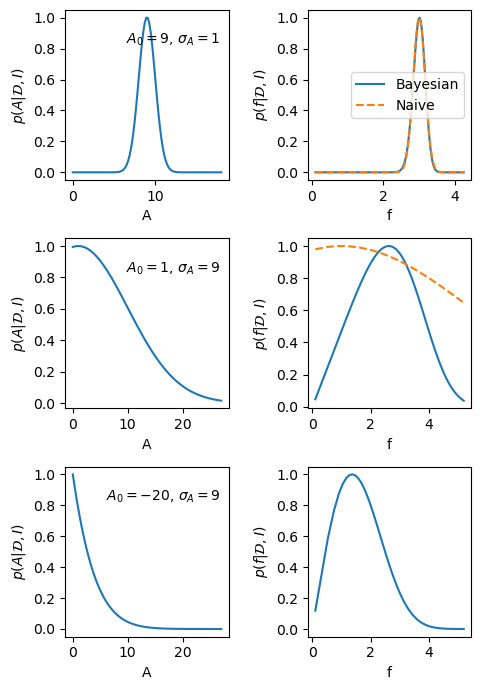

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def A_posterior(A,A0,sigA):
    pA = np.exp(-(A-A0)**2/(2*sigA**2))
    return pA/np.max(pA)

# Wrong analysis
def f_likelihood(f,A0,sigA):
    sigf = sigA / (2*np.sqrt(A0))
    pf = np.exp(-(f-np.sqrt(A0))**2/(2*sigf**2))
    return pf/np.max(pf)

# Correct error propagation
def f_posterior(f,A0,sigA):
    pf = f*np.exp(-(f**2-A0)**2/(2*sigA**2))
    return pf/np.max(pf)
    
fig_Af,axs=plt.subplots(3,2,figsize=(5,7))
for iA, (A0,sigA) in enumerate([(9,1),(1,9),(-20,9)]):
    maxA = max(2*A0,3*sigA)
    A_arr = np.linspace(0.01,maxA,100)
    f_arr = np.sqrt(A_arr)
    axs[iA,0].plot(A_arr,A_posterior(A_arr,A0,sigA))
    axs[iA,1].plot(f_arr,f_posterior(f_arr,A0,sigA),label='Bayesian')
    if A0>0:
        axs[iA,1].plot(f_arr,f_likelihood(f_arr,A0,sigA),'--',label='Naive')
    axs[iA,0].set(xlabel='A',ylabel=r'$p(A | \mathcal{D},I)$')
    axs[iA,0].text(0.95,0.8,f'$A_0={A0}$, $\sigma_A={sigA}$', \
    	horizontalalignment='right',\
    	transform=axs[iA,0].transAxes,fontsize=10)
    axs[iA,1].set(xlabel='f',ylabel=r'$p(f | \mathcal{D},I)$')
axs[0,1].legend(loc='best')
fig_Af.tight_layout()
glue(f"Af_fig", fig_Af, display=False)

## Solutions

```{solution} exercise:BayesianAdvantage:correlated-errors
:label: solution:BayesianAdvantage:correlated-errors
:class: dropdown

\begin{align*}
\pdf{z}{I} &= \int \pdf{z}{x,y,I} \pdf{x,y}{I} dxdy = \int \delta(z-\sqrt{2}s) p(s|I) p(t|I) dsdt
\\
&= \left\{ 
\begin{array}{l}
\tilde{s}=\sqrt{2}s \, \Rightarrow \, ds = d\tilde{s}/\sqrt{2} \\
\delta(z-\sqrt{2}s) \to \delta(z/\sqrt{2}-\tilde{s})
\end{array}
\right\}
= \frac{1}{\sqrt{2}\sqrt{2\pi}\sigma_s}\exp \left( - \frac{z^2}{4\sigma_s^2} \right) \int p(t|I) dt .
\end{align*}

Here we can use that $\int p(t|I) dt = 1$. Defining $\sigma_z = \sqrt{2}\sigma_s$ we find

$$
\pdf{z}{I} = \frac{1}{\sqrt{2\pi}\sigma_z}\exp \left( - \frac{z^2}{2\sigma_z^2} \right) ,
$$

i.e. a normal distribution for $z$ with a small variance $2\sigma_s^2$.
```

```{solution} exercise:BayesianAdvantages:inferring-galactic-distances-ex
:label: solution:BayesianAdvantages:inferring-galactic-distances-ex
:class: dropdown

1. A fixed value for $H$ can be assigned with the PDF $\pdf{H}{I} = \delta(H-H_0)$, where $\delta(x)$ is the Kronecker delta. We note that integrals over a delta function are given by $\int_{-\infty}^{+\infty} f(x) \delta(x-x_0) dx = f(x_0)$ such that

   $$
   \pdf{d}{\data,I} \propto \exp\left( - \frac{(v_0 - H_0 d)^2}{2\sigma_v^2} \right),
   $$
   
   where we have ignored all normalization coefficients.
   
2. With a Gaussian prior for $H$ we will be left with an integral

   $$
   \pdf{d}{\data,I} \propto \int_{-\infty}^{+\infty} dH \exp\left( - \frac{(H-H_0)^2}{2  \sigma_H^2} \right) \exp\left( - \frac{(v_0 - H d)^2}{2\sigma_v^2} \right).
   $$
   
   We can perform this integral numerically, or we can solve it analytically by realizing that the product of two Gaussian distributions is another Gaussian distribution. 
   
3. The uniform prior for $\pdf{H}{I}$ implies that the final integral becomes

   $$
   \pdf{d}{\data,I} \propto \int_{H_0 - 2\sigma_H}^{H_0 + 2\sigma_H} dH \exp\left( - \frac{(v_0 - H d)^2}{2\sigma_v^2} \right).
   $$
   
For numerical integration, and plots of the results of the three inference strategies, see the hidden code block below.
```

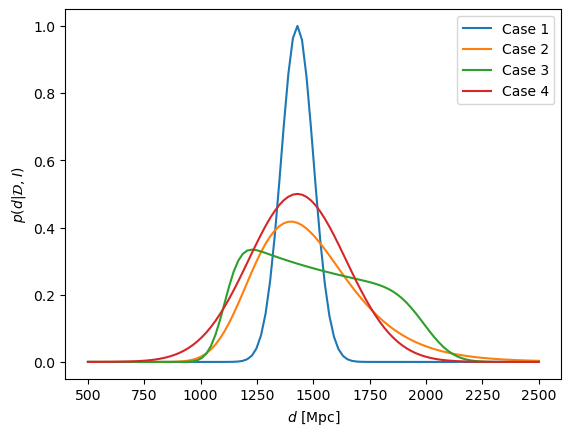

In [2]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Given information
H0=70
sigH=10
v0=10**5
sigv=5000

# grid for evaluating and plotting p(d|...)
dgrid = np.linspace(500,2500,100)

# Case 1
def pdf_1(d):
    return np.exp(-(v0-H0*d)**2/(2*sigv**2))
# Case 2
def pdf_2(H,d):
    return np.exp(-(H-H0)**2 / (2*sigH**2)) * np.exp(-(v0-H*d)**2 / (2*sigv**2))
# ... with numerical integration over H
pdf_2_grid = np.zeros_like(dgrid)
for i_d,di in enumerate(dgrid):
	I = integrate.quad(pdf_2, 0, 140, args=(di))
	pdf_2_grid[i_d] = I[0] / 20
# Case 3
def pdf_3(H,d):
    return np.exp(-(v0-H*d)**2 / (2*sigv**2))
# ... with numerical integration
pdf_3_grid = np.zeros_like(dgrid)
deltaH = np.sqrt(12*sigH**2/4)
for i_d,di in enumerate(dgrid):
	I = integrate.quad(pdf_3, H0-2*sigH, H0+2*sigH, args=(di))
	pdf_3_grid[i_d] = I[0] / 30
# Case 4 (see example 9.3)
d0 = v0/H0
sigd = d0*np.sqrt(sigH**2/H0**2 + sigv**2/v0**2)
def pdf_4(d):
    return np.exp(-(d-d0)**2 / (2*sigd**2)) / 2
    
fig,ax = plt.subplots(1,1)
ax.plot(dgrid,pdf_1(dgrid),label='Case 1')
ax.plot(dgrid,pdf_2_grid,label='Case 2')
ax.plot(dgrid,pdf_3_grid,label='Case 3')
ax.plot(dgrid,pdf_4(dgrid),label='Case 4')

ax.set_xlabel(r'$d$ [Mpc]')
ax.set_ylabel(r'$p(d|\mathcal{D},I)$')
ax.legend(loc='best');

```{solution} exercise:BayesianAdvantages:standard-random-variable
:label: solution:BayesianAdvantages:standard-random-variable
:class: dropdown

The transformation $z = f(x) = (x-\mu)/\sigma$ gives the inverse $x = f^{-1}(z) = \sigma z + \mu$ and the Jacobian $|dx/dz = \sigma|$.

Therefore $\pdf{z}{I} = \pdf{x}{I} \sigma$. With the given form of $\pdf{x}{I}$ we get

$$
\pdf{z}{I} = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{z^2}{2}\right),
$$

which corresponds to a Gaussian distribution with mean zero and variance one, sometimes known as a standard random variable.
```

```{solution} exercise:BayesianAdvantages:square-root-of-a-number
:label: solution:BayesianAdvantages:square-root-of-a-number
:class: dropdown

With $z = f(x) = \sqrt{x}$ we have $x = f^{-1}(z) = z^2$ such that $|dx/dz| = 2|z|$. We note that $z$ is positive such that $|z| = z$ and we therefore have

$$
\pdf{z}{I} = 2 z \pdf{x}{I} = 2 z \frac{1}{x_{\max} - x_{\min}} \quad \text{for } \sqrt{x_{\min}} \leq z \leq \sqrt{x_{\max}},
$$

and 0 elsewhere. 

We check the normalization by performing the integral

$$
\int_0^\infty \pdf{z}{I} dz = \int_{\sqrt{x_{\min}}}^{\sqrt{x_{\max}}} \frac{2z}{x_{\max} - x_{\min}} dz = \frac{1}{x_{\max} - x_{\min}} \left[ z^2 \right]_{\sqrt{x_{\min}}}^{\sqrt{x_{\max}}} = 1.
$$
```

```{solution} exercise:BayesianAdvantages:gaussian-sum-of-errors
:label: solution:BayesianAdvantages:gaussian-sum-of-errors
:class: dropdown

The PDF $\pdf{Z}{I}$ is Gaussian with mean $\expect{Z} = z_0 = x_0+y_0$ and variance $\var{Z} = \sigma_z^2 = \sigma_x^2 + \sigma_y^2$, where $x_0,y_0$ and $\sigma_x^2, \sigma_y^2$ are the means and variances of $X$ and $Y$, respectively.

This is the same result as in {prf:ref}`example:BayesianAdvantage:Z=X+Y` which should not be surprising since the errors were in fact Gaussian.
```

```{solution} exercise:BayesianAdvantages:gaussian-product-of-errors
:label: solution:BayesianAdvantages:gaussian-product-of-errors
:class: dropdown

The PDF $\pdf{Z}{I}$ is Gaussian with mean $\expect{Z} = z_0 = x_0 y_0$ and variance $\var{Z} = \sigma_z^2 = y_0^2 \sigma_x^2 + x_0^2 \sigma_y^2$, where $x_0,y_0$ and $\sigma_x^2, \sigma_y^2$ are the means and variances of $X$ and $Y$, respectively.
```